# Hands-on Tutorial : "An educational story as sung by data"
During the introductory tutorial, you will get familiar with the R environment, basic data preparation and data analysis of log-files recorded during learning activities that took place in Moodle. You will be given the chance to explore a  learner's practice - as captured by data - and reflect both from the perspective of the learner as well as from the viewpoint of the analyst.

If you have any questions about this tutorial, please contact: Irene-Angelica Chounta (chounta@ut.ee)

In this tutorial, we will use Jupyter notebook to compose and execute simple R instructions (code) for cleaning and preparing data for further analysis.

# Read data and set up the environment for analysis

<b>Step 1 - Import Libraries</b>
First step is to import all the libraries we will need for this example


In [1]:
library("ggplot2")

<b>Step 2 - Read Data</b>
the name of your datafile is: data.csv. It contains your own data as logged by Moodle during the course:
<b>"Technology use in education"</b>

We have anonymized the data for the purposes of this tutorial


In [2]:
mydata=read.csv("data.csv")
print("mydata")


[1] "mydata"


<b>Step 3 - Validate data<b>
check whether data is complete. Is there data missing?


In [3]:
#The variable nrows shows the total number of data entries and the variable ncomplete shows the number of complete data entries
#this means that the amount of missing data can be calculated as: nrows - ncomplete

nrows <- nrow(mydata)
ncomplete <-sum(complete.cases(mydata))

sprintf("Out of %i rows of data, %i are complete cases and %i data are missing", nrows, ncomplete, nrows - ncomplete)



[1] "Out of 117 rows of data, 117 are complete cases and 0 data are missing"

<i><b>Note:</b> In this example, because of the nature of our data (Moodle logfiles), there are no missing data. However, if there were some, we would have to take appropriate action depending on the context and the purpose of our analysis. For example, we could drop the missing data from our dataset or replace missing data with blanks, zeros etc.
</i>

<b>Step 4 - View variables</b>
Lets see what variables are contained in our data 


In [4]:
names(mydata)


[1] "X"              "Time"           "User.full.name" "Event.context" 
[5] "Component"      "Event.name"     "Description"    "Origin"        
[9] "IP.address"

<b>Step 5 - Validate format</b>
When working with data, we should always ensure that data are in an appropriate format.
For example, a numeric variable should be formatted as a number or a text variable is formatted as a string. 
Lets fix the formatting issue per variable for our own data!

In [5]:
#formatting Date and Time appropriately
mydata$Date <- format(as.POSIXct(mydata$Time,format="%d/%m/%Y, %H:%M"),"%Y-%m-%d")
mydata$Time.sec <- format(as.POSIXct(mydata$Time,format="%d/%m/%Y, %H:%M"),"%H:%M")

#formatting the rest of the variables as strings (character)

mydata$User.full.name <- as.character(mydata$User.full.name)
mydata$Event.context <- as.character(mydata$Event.context)
mydata$Component <- as.character(mydata$Component)
mydata$Event.name <- as.character(mydata$Event.name)
mydata$Description <- as.character(mydata$Description)
mydata$Origin <- as.character(mydata$Origin)
mydata$IP.address <- as.character(mydata$IP.address)

#and lets check our data again!
print(mydata)


      X            Time User.full.name
1     1 25/01/18, 19:04           1218
2     2 25/01/18, 19:04           1218
3     3 14/01/18, 14:50           1218
4     4 14/01/18, 14:45           1218
5     5 29/12/17, 14:33           1218
6     6 29/12/17, 14:33           1218
7     7 14/12/17, 18:23           1218
8     8 14/12/17, 18:23           1218
9     9 14/12/17, 18:12           1218
10   10 14/12/17, 18:12           1218
11   11 14/12/17, 18:12           1218
12   12  3/12/17, 20:00           1218
13   13  3/12/17, 20:00           1218
14   14  3/12/17, 20:00           1218
15   15 18/11/17, 20:56           1218
16   16 18/11/17, 20:53           1218
17   17 18/11/17, 20:52           1218
18   18 18/11/17, 17:29           1218
19   19 17/11/17, 16:26           1218
20   20 16/11/17, 14:01           1218
21   21 15/11/17, 21:14           1218
22   22 15/11/17, 21:14           1218
23   23 15/11/17, 21:14           1218
24   24 15/11/17, 21:14           1218
25   25 15/11/17, 21:14  

# View data

Now lets look closer at the contents of some of the variables from our data.
For example, lets see what kind of Events has Moodle recorded for this course, what kind of Components does this course use and also these data in combination!

In [6]:
#print out events
print(mydata$Event.name)
#print out components and events
cat(sprintf("\"%s\" \"%s\"\n", mydata$Component, mydata$Event.name))

  [1] "Course module viewed"                         
  [2] "Course viewed"                                
  [3] "Course viewed"                                
  [4] "Course viewed"                                
  [5] "Grade overview report viewed"                 
  [6] "Grade user report viewed"                     
  [7] "Course viewed"                                
  [8] "Course module viewed"                         
  [9] "Discussion viewed"                            
 [10] "Course module viewed"                         
 [11] "Course viewed"                                
 [12] "Grade overview report viewed"                 
 [13] "Grade user report viewed"                     
 [14] "Course viewed"                                
 [15] "Course viewed"                                
 [16] "Course viewed"                                
 [17] "Course module viewed"                         
 [18] "Course viewed"                                
 [19] "Course viewed"       

<i>In most cases, it is useful to have an overview of the user activity over time either by using descriptive statistics to quick summarize our data or by using visualizations. It is common and advisable for analysts to
visually inspect data before proceeding with analysis. This helps us to get a better pictures of our data, to gain 
early insights and eventually to avoid poor interpretations of the analysis results</i>

In [7]:
#show a summary of the number of user actions for different Moodle components.
#The following table tells us how many user actions relate to the various components.

table(mydata$Component)




             Assignment        File submissions                  Folder 
                      9                       2                       6 
                  Forum Online text submissions         Overview report 
                     33                       2                       2 
                 System                     URL             User report 
                     45                      16                       2 

In [8]:
#show a summary of the number of user actions for different event contexts.
#The following table tells us how many user actions relate to the various event contexts


table(mydata$Event.context)


                Assignment: Submit independent assignment 
                                                       12 
 Course: Technology Use in Education (SVHI.06.010), A\x9a 
                                                       50 
                     Folder: Additional reading materials 
                                                        4 
Folder: Presentations by Demetrios Sampson and Pihel Hunt 
                                                        2 
               Forum: Discuss technology use in education 
                                                        2 
             Forum: Discussions on independent assignment 
                                                        3 
                                             Forum: Forum 
                                                       26 
                                        Forum: News forum 
                                                        1 
                                                    Oth

<b>Question: What components have more actions? Why do you think this happens? How would you explain these numbers?</b>

# Data visualizations

For the example we explore in this tutorial, we want to have an overview of all the user activity over the 
whole duration of the course.
Therefore we will visualize the user activity over time, as recorded in the Moodle logfile

<i>Note: user activity is a discrete variable and a good way to represent it is using bars instead
of a continuous line </i>


Var1,Freq
0017-09-10,23
0017-09-11,2
0017-09-13,10
0017-09-14,4
0017-09-27,3
0017-09-29,7
0017-09-30,2
0017-10-02,2
0017-10-17,6
0017-10-19,2


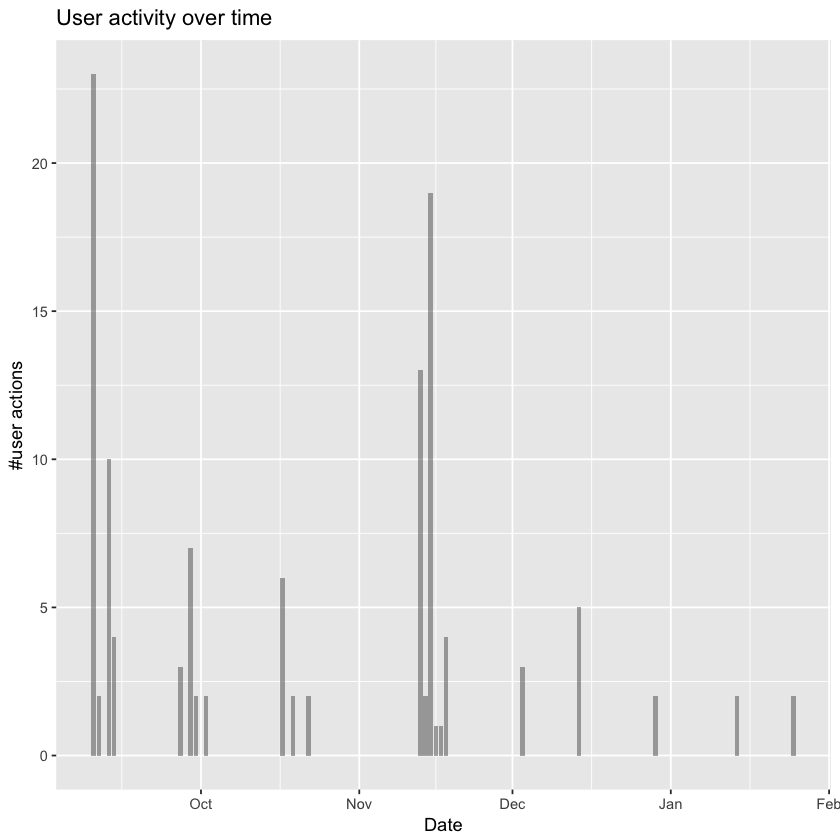

In [9]:
user_activity = as.data.frame(table(mydata$Date))
user_activity
ggplot(data=user_activity, aes(x=as.Date(Var1), y=Freq)) + geom_bar(alpha=.5,stat="identity") + xlab("Date") + ylab("#user actions") + labs(title = "User activity over time")




<b>Question: Can you explain qualitatively the patterns of user activity over time? How would you interpret these patterns as a student and how would you interpret them as a researcher?</b>


<i>In some cases (in most cases to be honest!), we are interested in breaking down user activity and focusing on specific aspects of the activity</i>

Lets assume that as analysts we are only interested in the user activity that relates to <b> course assignments and the forum</b>.


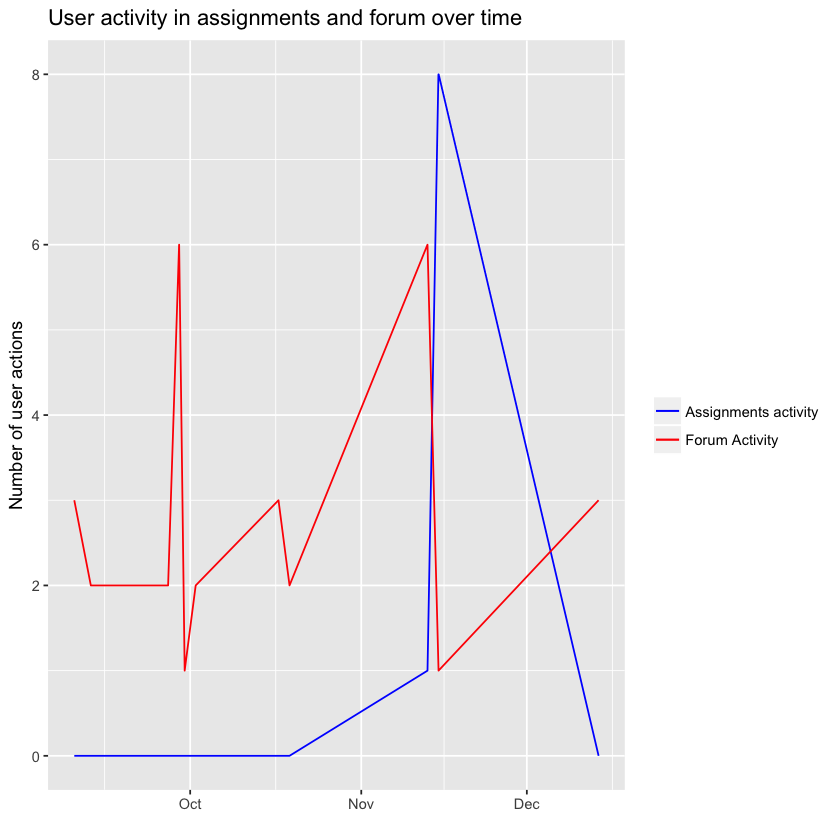

In [10]:
#select the user actions that are only related to assignments
assignments = mydata[which(mydata$Component == 'Assignment'),]
#and the user actions that are only related to forum activity
forum = mydata[which(mydata$Component == 'Forum'),]

#and prepare a new sub-dataset that contains the number of assignments-related and forum-related actions over time
assignments_time = as.data.frame(table(assignments$Date))
forum_time = as.data.frame(table(forum$Date))
colnames(assignments_time) <- c("Date", "assigment_related_actions")
colnames(forum_time) <- c("Date", "forum_related_actions")
total <- merge(assignments_time, forum_time, by= "Date", all= TRUE)
total$Date <- as.Date(factor(total$Date), format = "%Y-%m-%d")

#order data by date
total <- as.data.frame(total[order(as.Date(total$Date)),])


#replace any missing data with zeros
total[is.na(total)] <- 0


#and plot them!
ggplot(data = total, aes(x = Date)) +
  geom_line(aes(y = assigment_related_actions, colour = "Assignments activity")) +
  geom_line(aes(y = forum_related_actions, colour = "Forum Activity")) +
  
  scale_colour_manual("", 
                      breaks = c("Assignments activity", "Forum Activity"),
                      values = c("blue", "red")) +
  xlab(" ") +
  scale_y_continuous("Number of user actions") + 
  labs(title="User activity in assignments and forum over time")


<b><i>But why is this even useful?</i></b>
In our example, forum activity includes both the viewing activity (that is, when the user just browses the forum discussions) and the posting activity (that is, when the user contributes to the discussion). A common issue of online learning communities is that the majority of learners does not actively contribute to the knowledge exchange by contributing to the creating of content. Instead, they passively follow others' activity without active engagement. This behavior is known as <i><b>lurking</b></i> and it hinders the benefits of <b>learning in a social arena</b>.

Lets see how we did with respect to the posting activity!

[1] "This student visited the forum discussion 12 times and posted 1 post(s)"

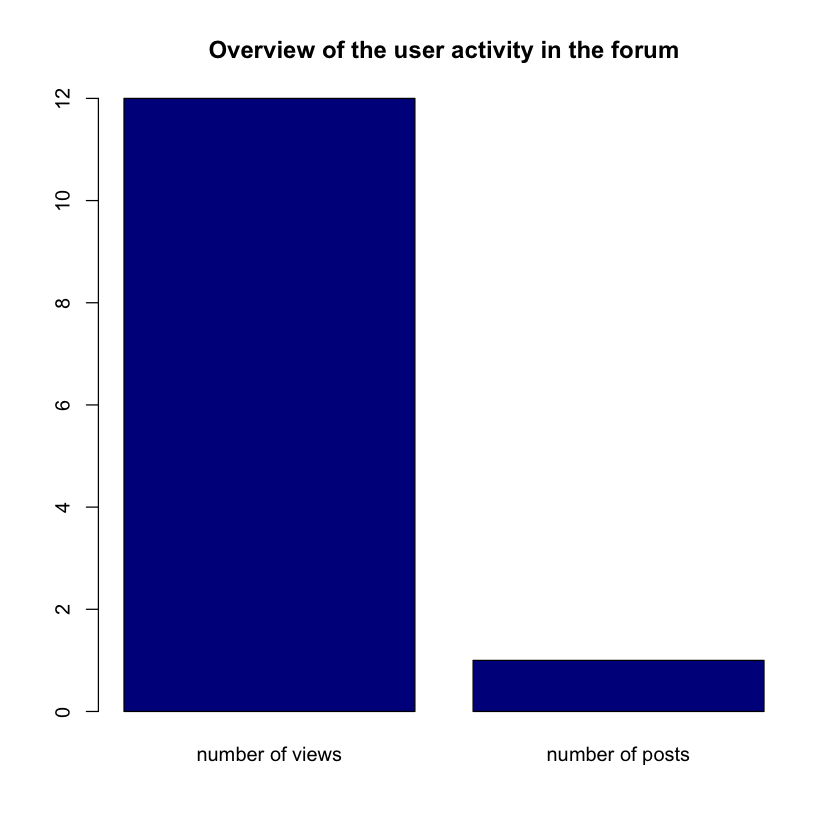

In [11]:
#calculate how many times the student viewed a forum discussion
views = forum[which(forum$Event.name == "Discussion viewed"),]

#calculate how many times the student posted in a forum discussion
posts = forum[which(forum$Event.name == "Post created"),]

# here we print out a message
sprintf("This student visited the forum discussion %i times and posted %i post(s)", nrow(views), nrow(posts))

# and we will also plot a graph of the users activity in the forum
vp = cbind(nrow(views), nrow(posts))
barplot(vp, main = "Overview of the user activity in the forum", names.arg=c("number of views", "number of posts"), 
        col=c("darkblue"))


# Descriptive Statistics and basic analysis

Descriptive statistics are used to describe the basic features of the data in a study. They provide simple summaries about the sample and the measures. Together with simple graphics analysis, they form the basis of virtually every quantitative analysis of data.

In [12]:
# we can also have an overview of the assignments-related and forum-related activity just by calculating basic descriptive
# statistics of our variables

summary(total$assigment_related_actions)
summary(total$forum_related_actions)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00    0.00    0.75    0.00    8.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    2.00    2.00    2.75    3.00    6.00 

In [13]:
# Another basic form of analysis that researchers usually carry out, is correlation analysis.
# Correlation analysis is used to study the strength of a relationship between two, numerically measured variables
# (for example, number of assignment-related actions and number of forum-related actions). This type 
# of analysis is useful when a researcher wants to establish if there are possible connections between variables. 

# Note: correlations indicate whether there might be a relationship between variables but NOT causality (that is, what is
# the cause and what the effect of a phenomenon)


#the value of sample estimates cor signifies the strength of corellation and the value of p (p-value) indicates 
#significance if p<0.05

cor.test(total$assigment_related_actions, total$forum_related_actions)



	Pearson's product-moment correlation

data:  total$assigment_related_actions and total$forum_related_actions
t = -0.83778, df = 10, p-value = 0.4217
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.7236397  0.3725653
sample estimates:
       cor 
-0.2560931 


<b>Question: According to rule of thumb, values between 0.3 and 0.6 indicate medium correlations and values higher than 0.6 indicate strong correlations. This indication is taken into account only if p <0.05 at least. What can you say about your correlation result?</b>

Our last task will be to <b>compare</b> the activity of a user in two different courses: a) Technology Use in Education and b) Creative Re-Use.

Execute the following code and provide your interpretation of the data visualization. What can you tell about the user's activity in the two courses?

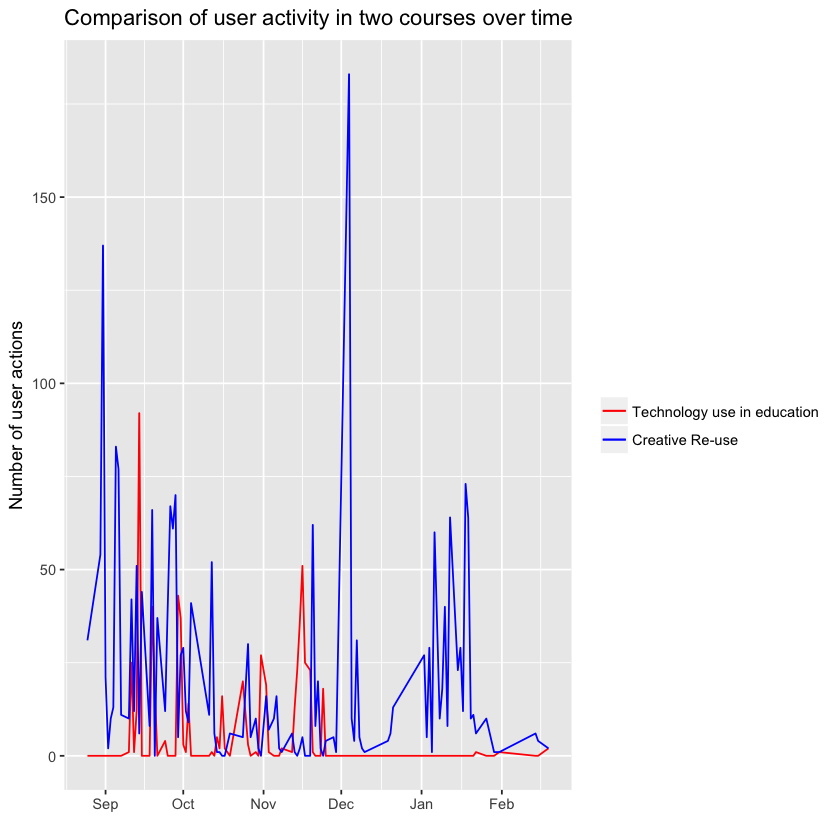

In [14]:
tu = read.csv("TUE.csv")

tu$Date <- format(as.POSIXct(tu$Time,format="%d/%m/%Y, %H:%M"),"%y-%m-%d")
tu$Time.sec <- format(as.POSIXct(tu$Time,format="%d/%m/%Y, %H:%M"),"%H:%M")


cr = read.csv("CR.csv")
cr$Date <- format(as.POSIXct(cr$Time,format="%d/%m/%Y, %H:%M"),"%y-%m-%d")
cr$Time.sec <- format(as.POSIXct(cr$Time,format="%d/%m/%Y, %H:%M"),"%H:%M")


course1 = as.data.frame(table(tu$Date))
course2 = as.data.frame(table(cr$Date))
colnames(course1) <- c("Date", "course1")
colnames(course2) <- c("Date", "course2")
twocourses <- merge(course1, course2, by= "Date", all= TRUE)
twocourses$Date <- as.Date(factor(twocourses$Date), format = "%Y-%m-%d")


#order data by date
twocourses <- as.data.frame(twocourses[order(as.Date(twocourses$Date)),])

#replace any missing data with zeros
twocourses[is.na(twocourses)] <- 0


#and plot them!
ggplot(data = twocourses, aes(x = Date)) +
  geom_line(aes(y = course1, colour = "Technology use in education")) +
  geom_line(aes(y = course2, colour = "Creative Re-use")) +
  
  scale_colour_manual("", 
                      breaks = c("Technology use in education", "Creative Re-use"),
                      values = c("blue", "red")) +
  xlab(" ") +
  scale_y_continuous("Number of user actions") + 
  labs(title="Comparison of user activity in two courses over time")


# One last thing....

<i> This is only an introduction to R. Please, download R and Rstudio and experiment a bit more by replicating this tutorial and taking it a step further!f you have any comments or questions, please don't hesitate to contact me :)

-irene

In [15]:
library("dplyr")


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [16]:
Unique_component_TUE <- unique(tu$Component)
Unique_component_Cr <- unique(cr$Component)
uus_tabel <- data.frame(Unique_component_Cr, c(1:1))
names(uus_tabel) <- c("Component", "Value")
uus_tabel
uus_tabelTUE <- data.frame(Unique_component_TUE, c(1:1))
names(uus_tabelTUE) <- c("Component", "Value")
uus_tabelTUE
veel_tabel_merge <- merge(uus_tabel, uus_tabelTUE, by= "Component", all= TRUE)
veel_tabel_merge[is.na(veel_tabel_merge)] <- 0
veel_tabel_merge_sum <- veel_tabel_merge %>%
        summarize(ResultCr=sum(Value.x), ResultTEU=sum(Value.y))
veel_tabel_merge_sum
# Second measuring lenght of the column/vector
veel_tabel <- data_frame(Cr=length(Unique_component_Cr), TEU=length(Unique_component_TUE))
# Had to turn into long format, I guess otherwise difficult to plot
veel_tabel_long <- gather(data = veel_tabel, key = "Courses", value = "Components", Cr, TEU)
ggplot(data = veel_tabel_long, aes(x=Courses, y=Components)) +
        geom_point(color = "red", size = 15) +
        labs(title = "Number of Components in TEU and Cr")
# Creating print-out
stargazer(veel_tabel_long, type = "html", summary = FALSE, 
          title = "Number of Components in TEU and Cr", out = "components freq long.html")
stargazer(veel_tabel, type = "html", summary = FALSE, 
          title = "Number of Components in TEU and Cr", out = "components freq wide.html")



Component,Value
Logs,1
System,1
Forum,1
URL,1
Assignment,1
Recycle bin,1
Submission comments,1
BigBlueButtonBN,1
File,1
Folder,1


Component,Value
Logs,1
System,1
Assignment,1
Single view,1
Grader report,1
User report,1
URL,1
Recycle bin,1
Page,1
Folder,1


ResultCr,ResultTEU
15,12


ERROR: Error in gather(data = veel_tabel, key = "Courses", value = "Components", : could not find function "gather"


In [18]:

Engage_cs_cr <- as.data.frame(table(cr$Date, cr$Event.name))
Engage_cs_cr
Engage_cs_tue <- as.data.frame(table(tu$Date, tu$cr$Event.name))
Engage_cs_tue
colnames(Engage_cs_cr) <- c("Date", "Cr_course")
colnames(Engage_cs_tue) <- c("Date", "TUE_course")
Engage_new <- merge(Engage_cs_tue,Engage_cs_cr, by="Date", all = TRUE)
Engage_new
View(Engage_new)
colnames(Engage_new) <- c("Date", "TUE_course", "TUE_value", "Cr_course", "Cr_value")
engage_fin <- Engage_new %>%
        group_by(Date) %>%
        filter(TUE_course=="Course viewed", Cr_course=="Course viewed") %>%
        select(Date, TUE_value, Cr_value)
library(tidyr)
View(engage_fin)
engage_tabel_long <- gather(data = engage_fin, key = "TUE_course", value = "Freq", TUE_value, Cr_value)
View(engage_tabel_long)
colnames(engage_tabel_long) <- c("Date", "Course", "Freq")
ggplot(data = engage_tabel_long, aes(x=Date, y=Freq)) +
        geom_point(aes(color=Course)) +
        theme_minimal()


Var1,Var2,Freq
17-08-25,BigBlueButtonBN activity viewed,1
17-08-30,BigBlueButtonBN activity viewed,0
17-08-31,BigBlueButtonBN activity viewed,0
17-09-01,BigBlueButtonBN activity viewed,1
17-09-02,BigBlueButtonBN activity viewed,0
17-09-03,BigBlueButtonBN activity viewed,0
17-09-04,BigBlueButtonBN activity viewed,3
17-09-05,BigBlueButtonBN activity viewed,10
17-09-06,BigBlueButtonBN activity viewed,5
17-09-07,BigBlueButtonBN activity viewed,2


ERROR: Error in table(tu$Date, tu$cr$Event.name): all arguments must have the same length
